<a href="https://colab.research.google.com/github/sivasaikiranakula/projects/blob/main/DataMiningProject_SAkula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target 

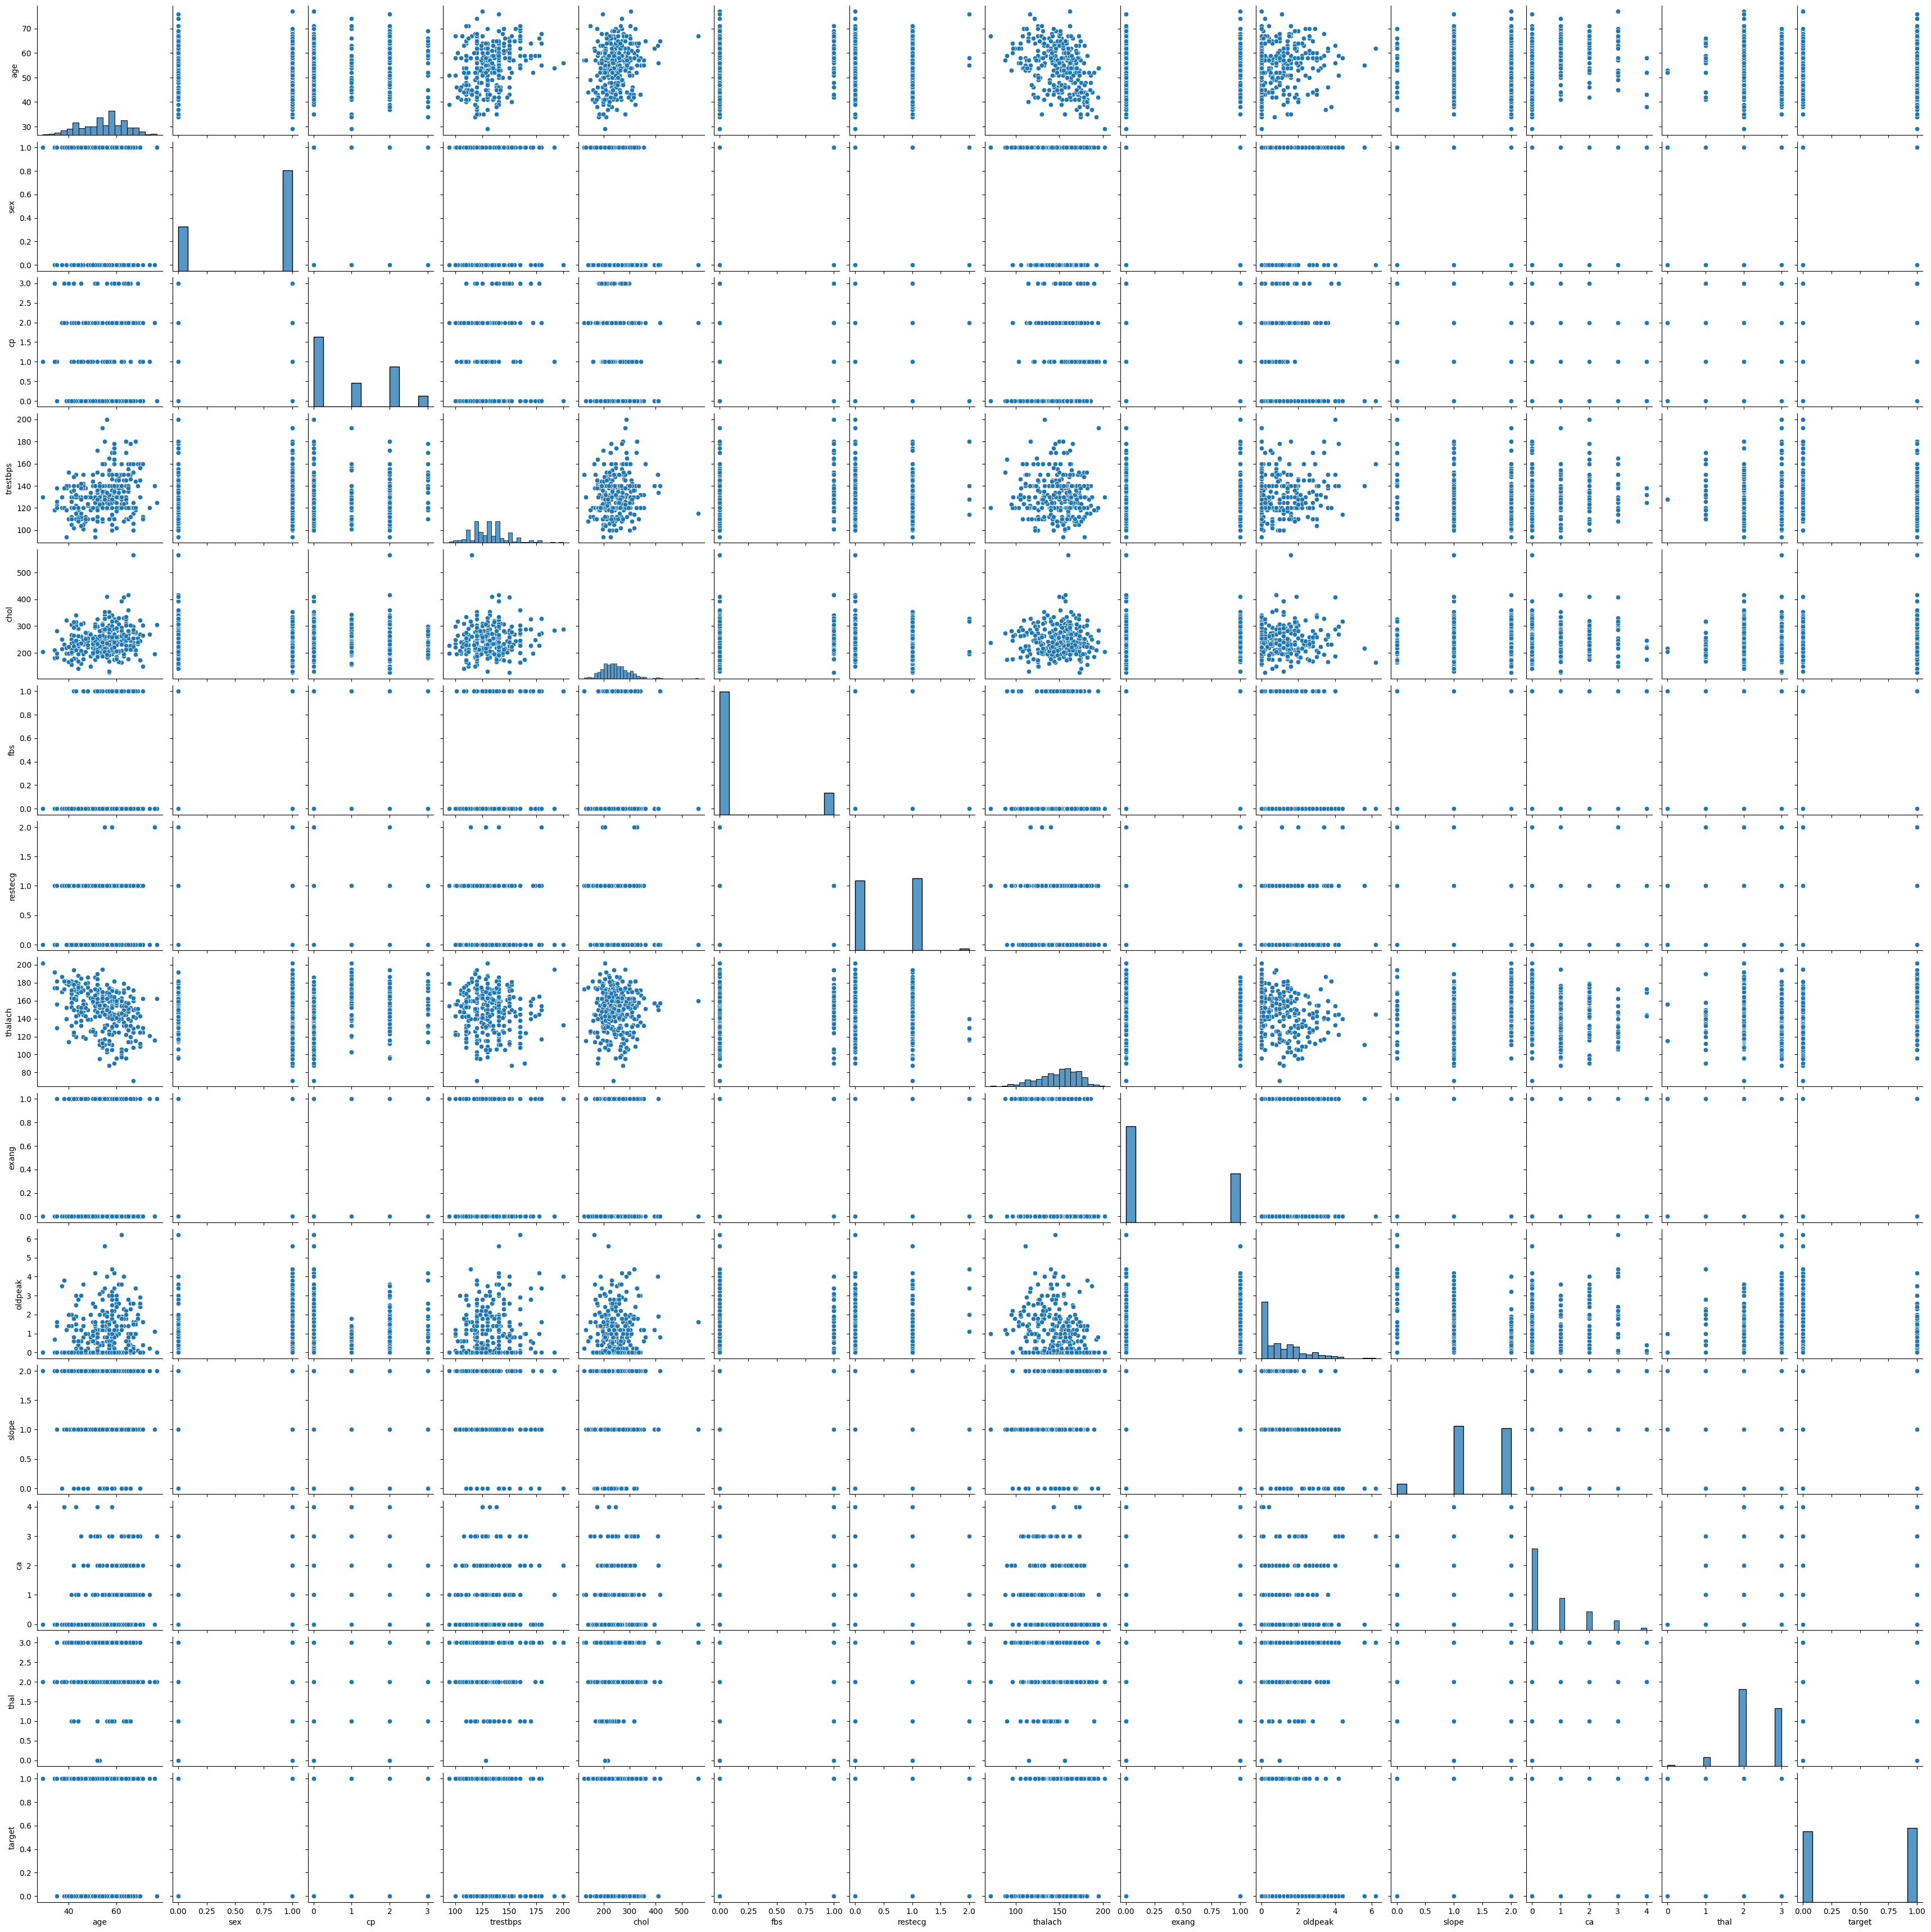

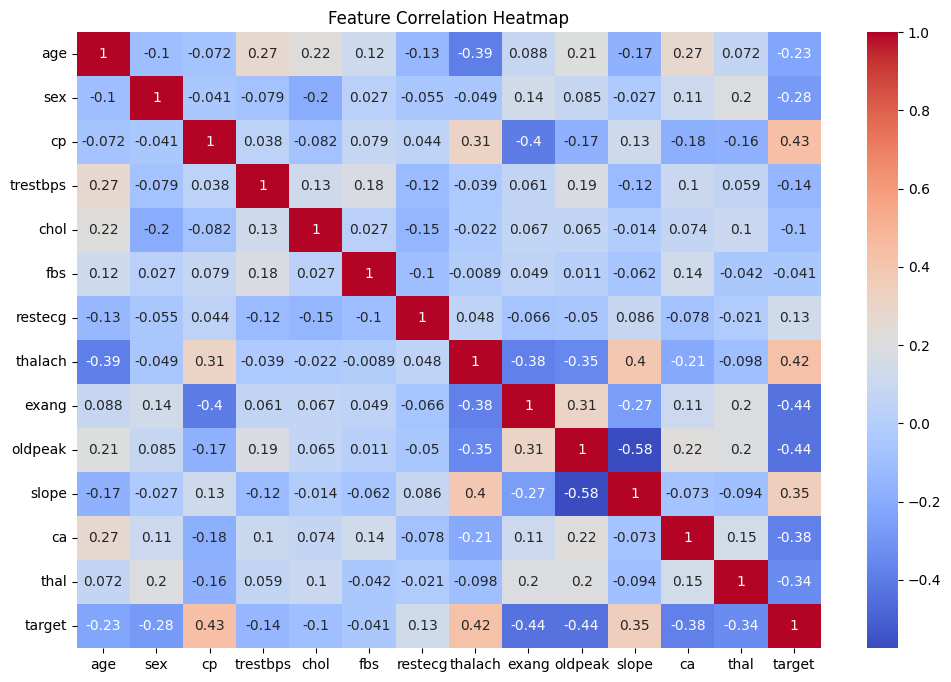

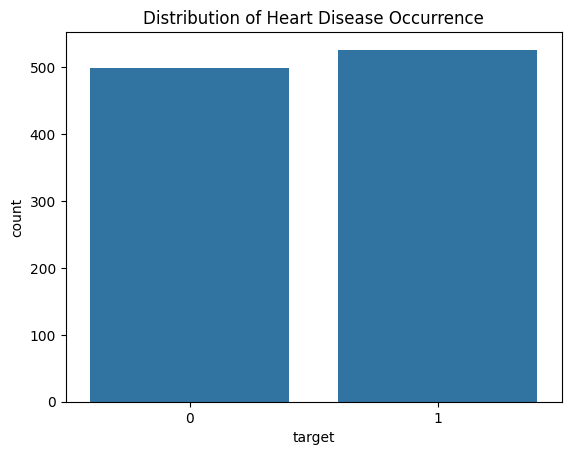

EDA Completed Successfully!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = '/content/heart.csv'  # Replace with the dataset path
heart_data = pd.read_csv(url)

# Display first few rows
heart_data.head()

# Dataset information
heart_data.info()

# Check for missing values
print("Missing values per column:")
print(heart_data.isnull().sum())

# Basic statistics of the dataset
heart_data.describe()

# Plotting pair plot to visualize relationships
sns.pairplot(heart_data)
plt.show()

# Check correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution of target variable
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Heart Disease Occurrence')
plt.show()

# Save preprocessed data
heart_data.to_csv("preprocessed_heart_data.csv", index=False)

print("EDA Completed Successfully!")

First 5 rows of dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Model Accuracy: 0.9854

Classification Report:
              precision    recall  f1-score   support

           0    

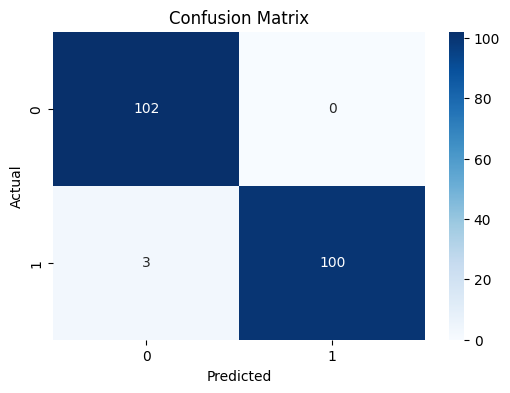


Preprocessing and Model Training Completed Successfully!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
url = '/heart.csv'  # Replace with your dataset path
heart_data = pd.read_csv(url)

# Display first few rows
print("First 5 rows of dataset:")
print(heart_data.head())

# Check for missing values
print("\nMissing values per column:")
print(heart_data.isnull().sum())

# Handle missing values (if any)
heart_data.fillna(heart_data.median(), inplace=True)

# Encode categorical variables (if needed)
encoder = LabelEncoder()
for col in heart_data.select_dtypes(include=['object']).columns:
    heart_data[col] = encoder.fit_transform(heart_data[col])

# Splitting dataset into features and target
X = heart_data.drop(columns=['target'])  # Assuming 'target' is the prediction column
y = heart_data['target']

# Splitting into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training - Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
import joblib
joblib.dump(model, "heart_disease_model.pkl")

# Save preprocessed data
heart_data.to_csv("preprocessed_heart_data.csv", index=False)

print("\nPreprocessing and Model Training Completed Successfully!")
